# 모듈 로드

In [1]:
import numpy as np
import pandas as pd
import warnings
import gc
from tqdm import tqdm_notebook as tqdm
import lightgbm as lgb
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime
from sklearn.metrics import roc_auc_score
warnings.filterwarnings("ignore")
gc.enable()

In [2]:
pd.set_option('max_rows', 500)
pd.set_option('max_colwidth', 500)
pd.set_option('max_columns', 500)

# 데이터 로드

In [3]:
train = pd.read_csv('./data/train.csv')
test = pd.read_csv('./data/test.csv')
train.shape, test.shape

((200000, 202), (200000, 201))

In [4]:
col_list = train.columns[2:]

In [5]:
train_0 = train[train.target == 0]
train_1 = train[train.target == 1]

In [6]:
pb_idx = np.load('./data_temp/public_LB.npy')
pv_idx = np.load('./data_temp/private_LB.npy')

In [7]:
test_pb = test.iloc[pb_idx].sort_index().copy()
test_pv = test.iloc[pv_idx].sort_index().copy()

test_real = test_pb.append(test_pv)

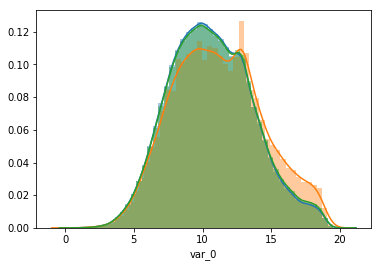

In [17]:
sns.distplot(train_0.var_0)
sns.distplot(train_1.var_0)
sns.distplot(train.var_0)

In [21]:
train.var_126.value_counts()

11.5356    305
11.5354    297
11.5355    285
11.5357    258
11.5353    255
11.5352    229
11.5358    228
11.5351    206
11.5359    182
11.5360    182
11.5350    179
11.5349    150
11.5361    145
11.5348    104
11.5362     96
11.5347     88
11.5363     78
11.5346     58
11.5364     46
11.5345     44
11.5365     42
11.5366     28
11.5344     26
12.7718     22
12.8373     22
12.8956     21
12.7735     21
12.6867     21
12.7295     21
12.5455     20
12.8919     20
12.5714     20
13.3051     20
12.7425     20
12.5190     20
12.6457     20
13.2913     20
12.8515     19
12.7002     19
13.3067     19
12.8811     19
12.5948     19
13.7444     19
12.4118     19
12.3853     19
12.8390     19
12.9507     19
13.9804     19
12.5790     19
13.0194     19
12.3814     19
13.0148     19
12.5801     19
12.7850     18
12.6344     18
12.6518     18
12.8367     18
13.0523     18
12.6561     18
13.2549     18
14.0451     18
12.8819     18
12.7726     18
12.9966     18
13.0996     18
12.7969     18
13.0621   

In [ ]:
'var12', 'var108', 'var126'